<a href="https://colab.research.google.com/github/frippe75/notebook-utils/blob/main/notebooks/notebook_utils_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Notebook Utils

This notebook demonstrates how to use the utilities provided by the `notebook-utils` package. We'll test both the inpainting and segmentation functionalities provided by the FaaS services.

### Prerequisites
Before running this notebook, ensure that you have:
- The `notebook-utils` repository cloned and accessible.
- Installed the required dependencies (`requests`, `opencv-python`, `numpy`).
- Set up the necessary environment variables: `RUNPOD_API_KEY` and `RUNPOD_ENDPOINT_ID`.

## Step 1: Setup

We'll start by importing the necessary functions from the `notebook-utils` package.

In [6]:
import sys
import os

# Verify that the repository path is correctly set
repo_path = '/content/notebook-utils'  # Adjust this path if necessary

!rm -rf $repo_path
# Git clone to that repo path
!git clone https://github.com/frippe75/notebook-utils.git $repo_path

# Add the repo path to the Python path
sys.path.append(repo_path)

# Import the functions from your cloned repository
from cloud_service_utils.inpainting import inpaint_image_via_faas
from cloud_service_utils.segmentation import segment_image_via_faas

# Set the RUN from ENV

os.environ['RUNPOD_API_KEY'] =



Cloning into '/content/notebook-utils'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 30 (delta 7), reused 26 (delta 6), pack-reused 0
Receiving objects: 100% (30/30), 5.38 MiB | 15.77 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Modules imported successfully.


## Step 1: Setup

We'll start by importing the necessary functions from the `notebook-utils` package.

In [7]:
import sys
import os

# Verify that the repository path is correctly set
repo_path = '/content/notebook-utils'  # Adjust this path if necessary

!rm -rf $repo_path
# Git clone to that repo path
!git clone https://github.com/frippe75/notebook-utils.git $repo_path

# Add the repo path to the Python path
sys.path.append(repo_path)

# Import the functions from your cloned repository
from cloud_service_utils.inpainting import inpaint_image_via_faas
from cloud_service_utils.segmentation import segment_image_via_faas

# Set the RUN from ENV
from google.colab import userdata
os.environ['RUNPOD_API_KEY'] = userdata.get('RUNPOD_API_KEY')



Cloning into '/content/notebook-utils'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 30 (delta 7), reused 26 (delta 6), pack-reused 0
Receiving objects: 100% (30/30), 5.38 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Step 2: Load an Image

Let's load an image that we'll use for testing both inpainting and segmentation.

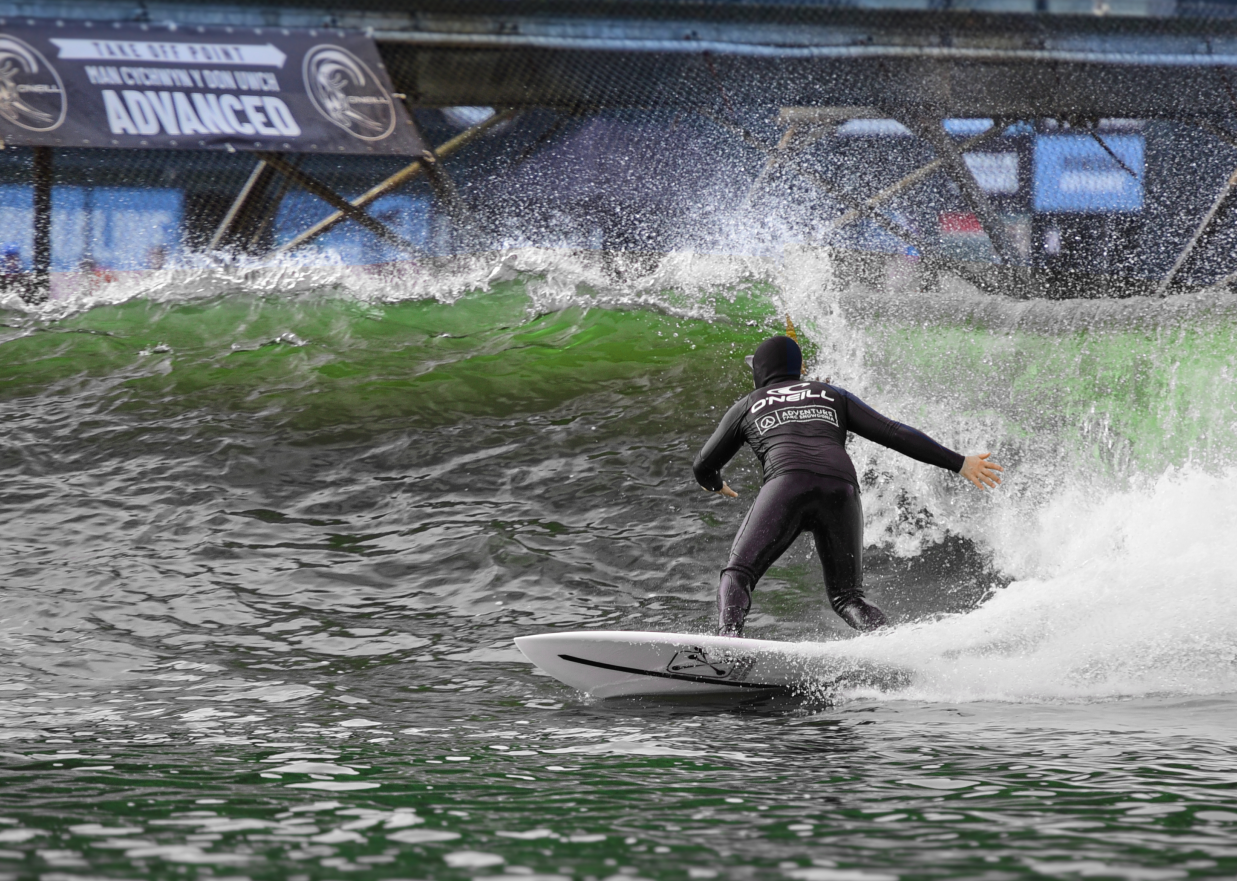

In [9]:
from google.colab.patches import cv2_imshow

# Load an image using OpenCV
image_path = repo_path + '/images/surf-image.png'
image = cv2.imread(image_path)

# Display the loaded image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

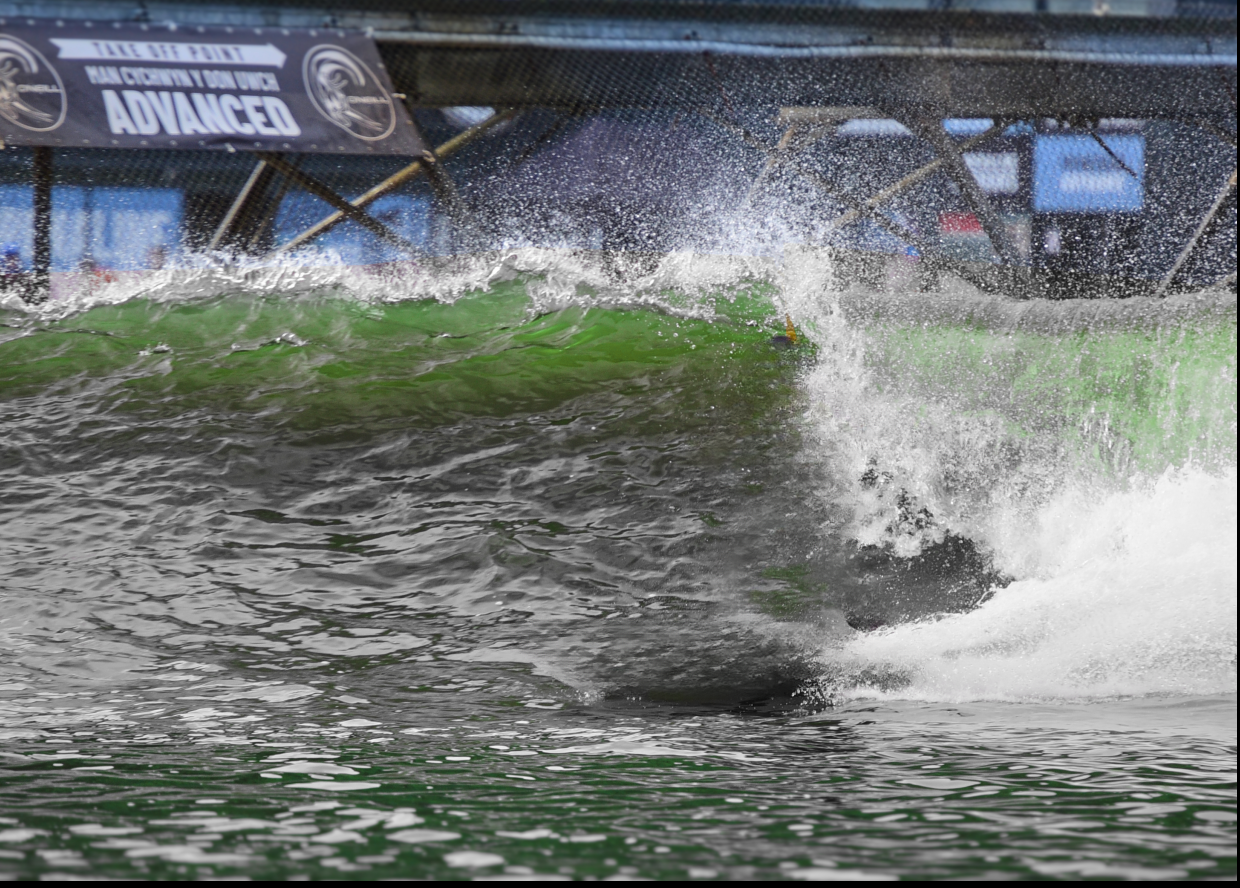

In [11]:
# Load the mask
mask_path = repo_path + '/images/surf-mask.png'
mask = cv2.imread(mask_path)

# Perform inpainting
result_image = inpaint_image_via_faas(image=image, mask=mask)

# Display
cv2_imshow(result_image)


## Step 3: Perform Segmentation

We'll use the `segment_image_via_faas` function to segment specific objects from the image. For this example, let's assume we're interested in detecting objects such as 'person' and 'car'.

In [ ]:
# Perform segmentation using the FaaS service
class_names = ['person', 'car']  # Specify the object classes to detect
segmentation_result = segment_image_via_faas(image=image, class_names=class_names, debug=True)

# Process the result
masks = segmentation_result['masks']
bounding_boxes = segmentation_result['bounding_boxes']

# Display the masks
for i, mask in enumerate(masks):
    cv2.imshow(f'Mask {i+1}', mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Step 4: Perform Inpainting

Using the masks obtained from the segmentation, we'll inpaint the image to remove the detected objects.

In [ ]:
# For simplicity, we'll use the first mask to remove the object from the image
if masks:
    result_image = inpaint_image_via_faas(image=image, mask=masks[0], debug=True)

    # Display the inpainted image
    cv2.imshow('Inpainted Image', result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('No objects found for inpainting.')

## Conclusion

In this notebook, we:
- Loaded an image.
- Used the segmentation FaaS service to detect specific objects.
- Inpainted the detected objects to remove them from the image.

This demonstrates the power of combining inpainting and segmentation in a Jupyter notebook using the `notebook-utils` package.